<font color="#CA3532"><h1 align="left">**Máster en Big Data y Data Science - Fundamentos de Análisis de Datos**</h1></font>
## **PCA en dataset de credit scoring**

#### Manuel Sánchez-Montañés

In [1]:
COLAB = True

First we import the libraries we will need. In addition we will use the first code cell to activate the *inline* mode for the graphics generated by *matplotlib*. We also initialize the seed of the random generator.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## **Data Load**

Now we load the database:

In [3]:
if COLAB:
    from urllib.request import urlretrieve
    import os
    os.makedirs("datasets", exist_ok=True)
    urlretrieve("https://drive.google.com/uc?export=download&id=1LRagJb0IJPIR9evKpU5v5rpBhKbAxAQw",
                "datasets/credit_scoring.csv")
    urlretrieve("https://drive.google.com/uc?export=download&id=1KLLKiw0qVFLVYtjZzdE5sijtdv5p9DJ6",
                "datasets/credit_scoring_Data_Dictionary.xls")

data = pd.read_csv('datasets/credit_scoring.csv', delimiter=',', header=0)
data.drop(data.columns[0], axis='columns', # quitamos la primera columna
          inplace=True) 

class_column = 'SeriousDlqin2yrs'
classes_names = data[class_column].unique()

print('\033[1m' + 'Credit scoring database\n', '\033[0m')
print('Number of real classes: %d' % len(classes_names))
print('Unique class labels:', classes_names, '\n')
print('\033[1m' + 'First 5 instances:' + '\033[0m')
data.head()

Credit scoring database
 
Number of real classes: 2
Unique class labels: [1 0] 

First 5 instances:


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## **Data Description**

In [4]:
description = pd.read_excel('datasets/credit_scoring_Data_Dictionary.xls', header=1)
pd.set_option('display.max_colwidth', 200)
description

,Variable Name,Description,Type
0,SeriousDlqin2yrs,Person experienced 90 days past due delinquency or worse,Y/N
1,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits,percentage
2,age,Age of borrower in years,integer
3,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days past due but no worse in the last 2 years.,integer
4,DebtRatio,"Monthly debt payments, alimony,living costs divided by monthy gross income",percentage
5,MonthlyIncome,Monthly income,real
6,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards),integer
7,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or more past due.,integer
8,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans including home equity lines of credit,integer
9,NumberOfTime60-89DaysPastDueNotWorse,Number of times borrower has been 60-89 days past due but no worse in the last 2 years.,integer


## **Data Exploration**

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


### **Missing values**

In [7]:
data.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [8]:
clean_data = data.copy()
medians = data.median()
#clean_data.dropna(axis=0, inplace=True)
clean_data.fillna(medians, inplace = True)
clean_data.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

In [9]:
attribute_names = list(clean_data.columns)
attribute_names.remove(class_column)

print(class_column)
print(classes_names)
print(attribute_names)

SeriousDlqin2yrs
[1 0]
['RevolvingUtilizationOfUnsecuredLines', 'age', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']


### **Outliers**

In [10]:
process_outliers = True

def percentile_outlier_detector(x, threshold=95.):
    diff = (100 - threshold) / 2.
    (minval, maxval) = np.percentile(x, [diff, 100. - diff])
    return ((x < minval) | (x > maxval))

if process_outliers:
    outlier_detector = percentile_outlier_detector
    
    attributes_outliers_processing = attribute_names.copy()
    attributes_outliers_processing.remove('NumberOfDependents')
    attributes_outliers_processing.remove('age')
    #attributes_outliers_processing.remove('NumberOfOpenCreditLinesAndLoans')
    #attributes_outliers_processing.remove('NumberRealEstateLoansOrLines')
    #print(attributes_outliers_processing)
    
    # Removing of any example that has at least one outlier value in a column
    for colname in attributes_outliers_processing:
        is_outlier = outlier_detector(clean_data[colname], threshold=98.)
        clean_data = clean_data[~is_outlier]

    clean_data.describe()

### **Estadísticas**

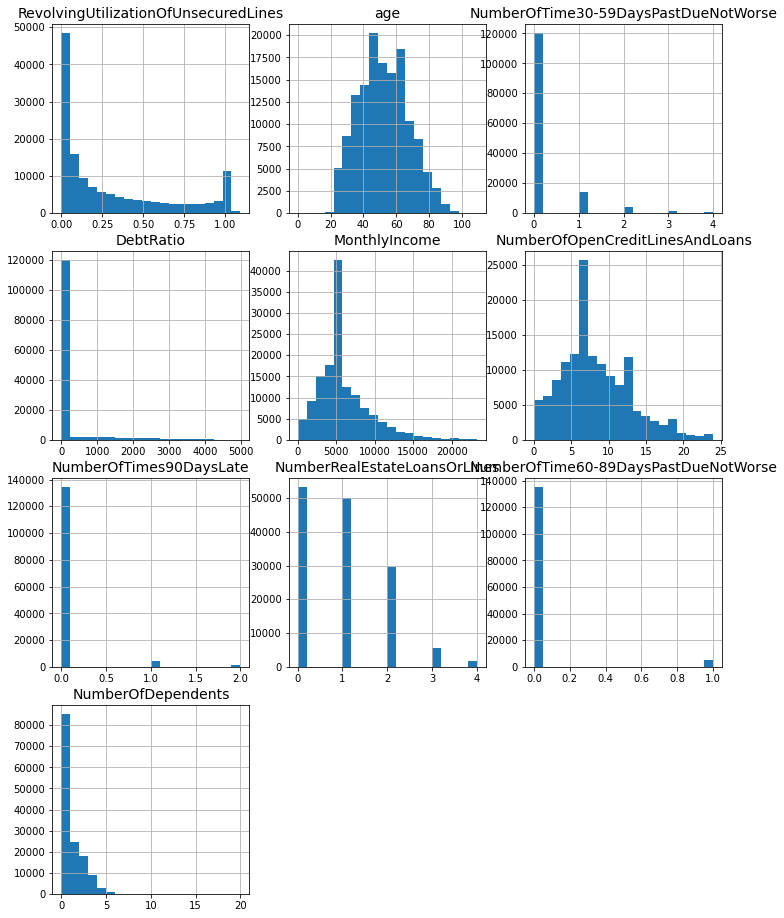

In [11]:
nrows = int(np.ceil(len(attribute_names) / 3))
plt.figure(figsize=(12,4*nrows))
for i in range(len(attribute_names)):
    name = attribute_names[i]
    plt.subplot(nrows,3,i+1)
    clean_data[name].hist(bins=20)
    plt.title(name, fontsize=14)

In [15]:
X = clean_data.values
y = clean_data[class_column]

In [ ]:
clean_data.

In [16]:
def muestra_matriz_correlacion(X, nombres_atributos):
    plt.imshow(np.corrcoef(X, rowvar=0),
#               interpolation="nearest",
               cmap='bwr', vmin=-1, vmax=1)
    plt.title('Matriz de correlación')
    plt.xticks(range(len(nombres_atributos)),
               nombres_atributos,fontsize=12,rotation=90)
    plt.yticks(range(len(nombres_atributos)),
               nombres_atributos,fontsize=12)
    plt.colorbar(ticks=[-1., -.5, 0., .5, 1.])

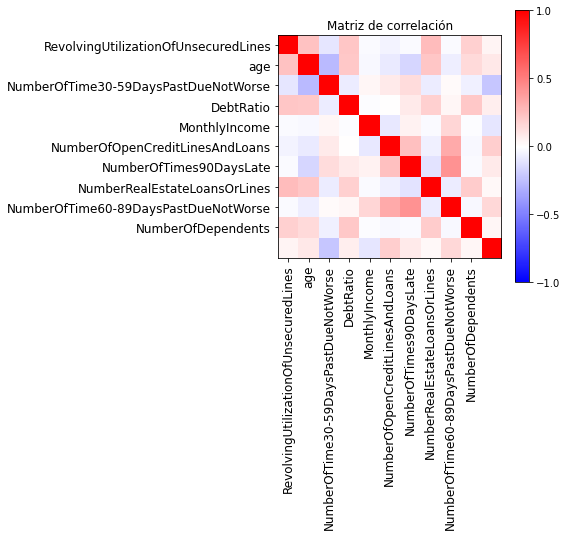

In [17]:
plt.figure(figsize=(5,5))
muestra_matriz_correlacion(X, attribute_names);

# **PCA**

After loading the database we need to do some basic preprocessing: standarization and PCA:

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_std = StandardScaler().fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_std)

print()
print('-- Estadísticas de los datos proyectados en las componentes principales --')
print()
#pd.DataFrame(X_pca).describe()

for i in range(X_pca.shape[1]):
    print("* Datos en componente principal", i+1, ":")
    print("  - Media    :", X_pca[:,i].mean().round(3))
    print("  - Varianza :", X_pca[:,i].var(ddof=1).round(3))
    print("  - Autovalor:", pca.explained_variance_[i].round(3))
    print("  - Varianza explicada:", (100*pca.explained_variance_ratio_[i]).round(3), "%")
    print()

# IMPORTANT: note that we have used all the patterns in the dataset
# to fit the parameters of StandardScaler and PCA
# This is ONLY ok if we are NOT going to develop a predictive model
# for "y" using this data (in that case, we would use both training and test
# data for fitting the parameters, and using test data for fitting is forbidden!)
#
# If we were going to develop a model for predicting the value
# of a target variable "y" (classification / regression problem),
# first we would need to split the dataset in training and test sets:
#
# testsize = 0.2
# Xaux_train, Xaux_test, y_train, y_test = train_test_split(Xaux, y, test_size=testsize)
#
# and both the normalization and PCA should be fitted using only the training set:
#
# std_scaler = StandardScaler()
# std_scaler.fit(Xaux_train)
# X_std_train = std_scaler.transform(Xaux_train)
# pca = PCA(n_components=2)
# pca.fit(X_std_train)
# X_train = pca.transform(X_std_train)
#
# X_std_test = std_scaler.transform(Xaux_test)
# X_test = pca.transform(X_std_test)



-- Estadísticas de los datos proyectados en las componentes principales --

* Datos en componente principal 1 :
  - Media    : 0.0
  - Varianza : 2.037
  - Autovalor: 2.037
  - Varianza explicada: 18.523 %

* Datos en componente principal 2 :
  - Media    : 0.0
  - Varianza : 1.725
  - Autovalor: 1.725
  - Varianza explicada: 15.685 %

* Datos en componente principal 3 :
  - Media    : 0.0
  - Varianza : 1.23
  - Autovalor: 1.23
  - Varianza explicada: 11.181 %

* Datos en componente principal 4 :
  - Media    : 0.0
  - Varianza : 1.057
  - Autovalor: 1.057
  - Varianza explicada: 9.613 %

* Datos en componente principal 5 :
  - Media    : 0.0
  - Varianza : 0.84
  - Autovalor: 0.84
  - Varianza explicada: 7.641 %

* Datos en componente principal 6 :
  - Media    : -0.0
  - Varianza : 0.818
  - Autovalor: 0.818
  - Varianza explicada: 7.434 %

* Datos en componente principal 7 :
  - Media    : 0.0
  - Varianza : 0.742
  - Autovalor: 0.742
  - Varianza explicada: 6.747 %

* Datos en co

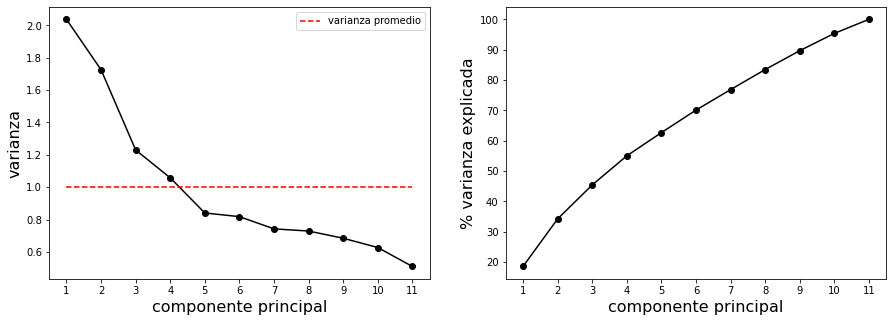

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(1,pca.n_components_+1), pca.explained_variance_, '-ok')
plt.plot([1,pca.n_components_], [1,1], '--r', label='varianza promedio')
plt.legend()
plt.xlabel('componente principal', fontsize=16)
plt.ylabel('varianza', fontsize=16)
plt.xticks(range(1,pca.n_components_+1))

plt.subplot(1,2,2)
plt.plot(range(1,pca.n_components_+1),
         100*pca.explained_variance_ratio_.cumsum(), '-ok')
plt.xlabel('componente principal', fontsize=16)
plt.ylabel('% varianza explicada', fontsize=16)
plt.xticks(range(1,pca.n_components_+1));

In [ ]:
pcs_names = ['componente principal '+str(i+1) for i in range(pca.n_components_)]
pcs_names

In [ ]:
pc_x = 1
pc_y = 2

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
alphas  = [0.01, 0.005] # azul, naranja
markers = ['s', 'v', 'o', 'd', 's', 'v', 'o', 'd', 's']

fig = plt.figure(figsize=(7,5))
for label,color,marker,alpha in zip(classes_names,colors,markers,alphas):
    inds = np.where(y == label)[0]
    plt.scatter(X_pca[inds, pc_x],
                X_pca[inds, pc_y],
                s = 60,
                c = color,
                marker = marker,
                alpha = alpha,
                cmap='RdYlGn',
                label = label)

plt.legend(); plt.grid(); plt.tight_layout()
plt.title('Credit scoring dataset, PCA space', fontsize=16)
plt.xlabel(pcs_names[pc_x], fontsize=16)
plt.ylabel(pcs_names[pc_y], fontsize=16);

In [ ]:
def PCA_plot(X_std, y, attribute_names, classes_names,
             colors, markers, pca, pcs_names,
             ax, pc_x=0, pc_y=1, escala_flechas=1, alpha=0.5):
    X_pca = pca.transform(X_std)
    for label,color,marker in zip(classes_names,colors,markers):
        inds = np.where(y == label)[0]
        plt.scatter(X_pca[inds, pc_x],
                    X_pca[inds, pc_y],
                    s = 60,
                    c = color,
                    marker = marker,
                    alpha = alpha,
                    cmap='RdYlGn',
                    label = label)
    factor = escala_flechas*6*np.sqrt(np.max(np.cov(X_std,rowvar=False)))
    aux = np.eye(len(attribute_names))
    attributes_PCA = pca.transform(aux)
    for a,name in zip(attributes_PCA,attribute_names):
        ax.arrow(0, 0, a[pc_x]*factor, a[pc_y]*factor,
                 head_width=1/4*0.05*factor*1.5/escala_flechas,
                 head_length=1/4*0.1*factor*1.5/escala_flechas,
                 fc='k', ec='k')
        plt.text(a[pc_x]*factor, a[pc_y]*factor, name, color='r')
        
    plt.legend(); plt.grid(); plt.tight_layout()
    plt.xlabel(pcs_names[pc_x], fontsize=16)
    plt.ylabel(pcs_names[pc_y], fontsize=16)

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(1,1,1)
PCA_plot(X_std, y, attribute_names, classes_names,
         colors, markers, pca, pcs_names, ax, pc_x=0, pc_y=1,
         escala_flechas=3, alpha=0.01)
plt.title('Credit scoring dataset, coordenadas PCA', fontsize=16)
plt.axis('equal');

In [ ]:
nrows = int(np.ceil(pca.n_components_/3))
plt.figure(figsize=(12,4*nrows))
for i in range(pca.n_components_):
    plt.subplot(nrows,3,i+1)
    plt.hist(X_pca[:,i], bins=20)
    plt.title(pcs_names[i], fontsize=14)

In [ ]:
plt.figure(figsize=(5,5))
muestra_matriz_correlacion(X_pca, pcs_names);